In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/cleanedDataset.csv')
df.head(30)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

## Splitting numericals and categoricals

In [5]:
numericals = df.select_dtypes(np.number)
categoricals = df.select_dtypes(object).drop(columns='Attrition', axis = 1)
y= df['Attrition']

In [6]:
numericals.shape

(1470, 22)

## Scaling numericals before feature selection

In [7]:
# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numericals)

num_scaled = scaler.transform(numericals)
num_scaled = pd.DataFrame(num_scaled, columns=numericals.columns, index=numericals.index)

In [8]:
# save the scaler
with open('../scalers/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file, pickle.HIGHEST_PROTOCOL)

## Feature selection for numerical variables

In [9]:
var_threshold = 0.05
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(num_scaled)
temp = sel.transform(num_scaled)
temp_df = pd.DataFrame(temp)
print(num_scaled.shape)
print(temp_df.shape)

(1470, 22)
(1470, 15)


In [10]:
temp_df.columns = sel.get_feature_names_out()
temp_df.head()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.000000
1,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.666667
2,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.666667
3,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.666667
4,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.666667


In [11]:
temp_df.shape

(1470, 15)

## Encoding categoricals 

In [12]:
categoricals.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [13]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals)

cat_enc = encoder.transform(categoricals).toarray()
cat_enc = pd.DataFrame(cat_enc, columns=encoder.get_feature_names_out(), index=categoricals.index)
cat_enc.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
# save the encoder
with open('../encoders/encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file, pickle.HIGHEST_PROTOCOL)

## concatenate scaled and selected numericals and encoded categoricals
## And X/y split

In [15]:
X = pd.concat([cat_enc, temp_df], axis=1)
y= df['Attrition']

## Train Test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(1176, 36)

In [18]:
X_test.shape

(294, 36)

## Define a function to build and evaluate models

In [ ]:
def build_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('')
    print(f"Accuracy of train set: {round(accuracy_score(y_train, y_train_pred), 3)}")
    print('')
    print("Classification report of train set:") 
    print(classification_report(y_train, y_train_pred))
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp1 = ConfusionMatrixDisplay(cm_train, display_labels=model.classes_)
    disp1.plot()
    plt.show()
    
    print('')
    print(f"Accuracy of test set: {round(accuracy_score(y_test, y_test_pred), 3)}")
    print('')
    print("Classification report of test set:") 
    print(classification_report(y_test, y_test_pred))
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp2 = ConfusionMatrixDisplay(cm_test, display_labels=model.classes_)
    disp2.plot()
    plt.show()
    
    

In [19]:
import functions

## Logistic Regression model


Accuracy of train set: 0.876

Classification report of train set:
              precision    recall  f1-score   support

          No       0.89      0.97      0.93       978
         Yes       0.75      0.40      0.52       198

    accuracy                           0.88      1176
   macro avg       0.82      0.69      0.72      1176
weighted avg       0.86      0.88      0.86      1176



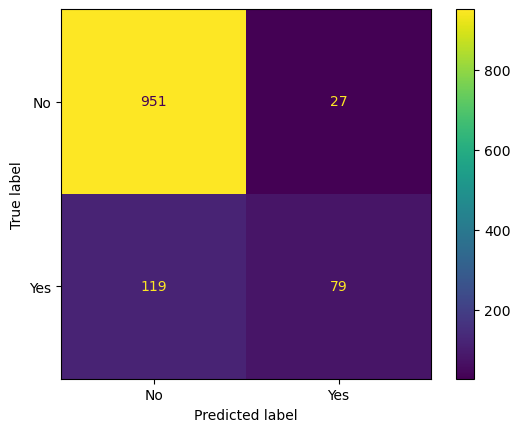


Accuracy of test set: 0.867

Classification report of test set:
              precision    recall  f1-score   support

          No       0.90      0.96      0.93       255
         Yes       0.50      0.28      0.36        39

    accuracy                           0.87       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.84      0.87      0.85       294



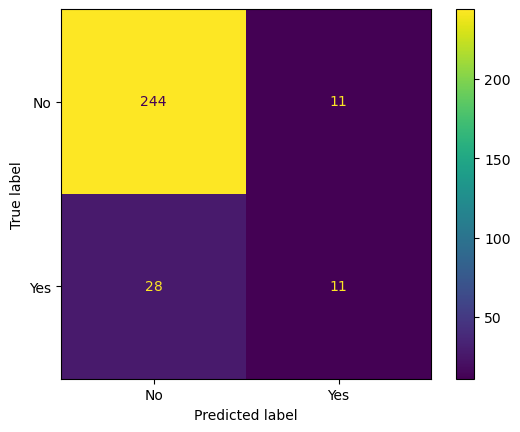

In [20]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
functions.build_evaluate_model(model, X_train, X_test, y_train, y_test)

## KNN Classifier

Find best k value:

Maximum accuracy:- 0.8877551020408163 at K = 3


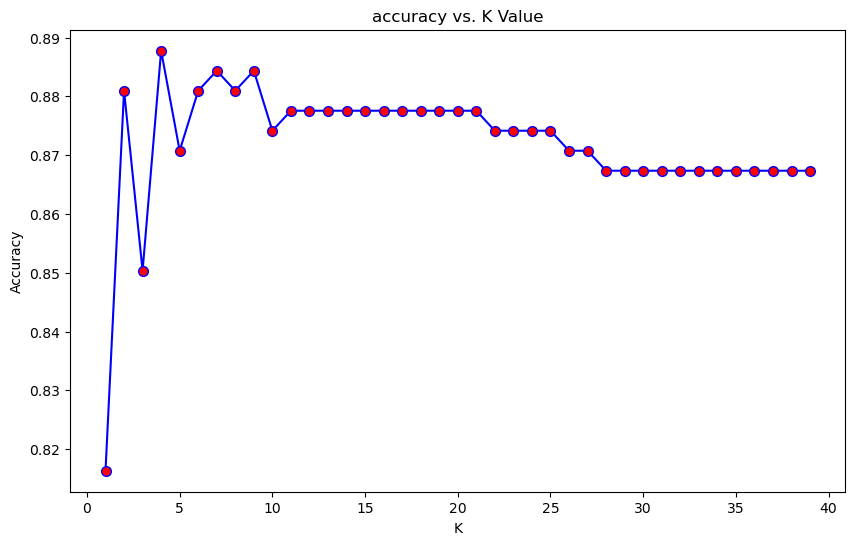

In [21]:
functions.find_k_value(X_train, X_test, y_train, y_test)


Accuracy of train set: 0.859

Classification report of train set:
              precision    recall  f1-score   support

          No       0.86      0.99      0.92       978
         Yes       0.82      0.21      0.33       198

    accuracy                           0.86      1176
   macro avg       0.84      0.60      0.63      1176
weighted avg       0.85      0.86      0.82      1176



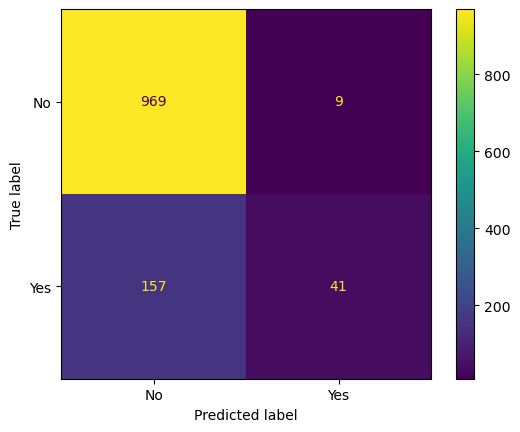


Accuracy of test set: 0.888

Classification report of test set:
              precision    recall  f1-score   support

          No       0.89      1.00      0.94       255
         Yes       1.00      0.15      0.27        39

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



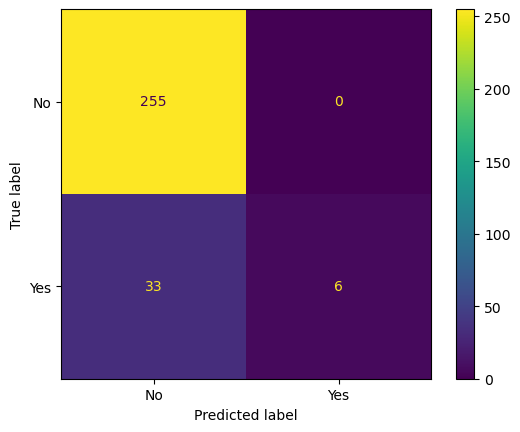

In [22]:
model = KNeighborsClassifier(n_neighbors=4)
functions.build_evaluate_model(model, X_train, X_test, y_train, y_test)

## Decision Tree Classifier


Accuracy of train set: 0.89

Classification report of train set:
              precision    recall  f1-score   support

          No       0.89      0.99      0.94       978
         Yes       0.91      0.39      0.54       198

    accuracy                           0.89      1176
   macro avg       0.90      0.69      0.74      1176
weighted avg       0.89      0.89      0.87      1176



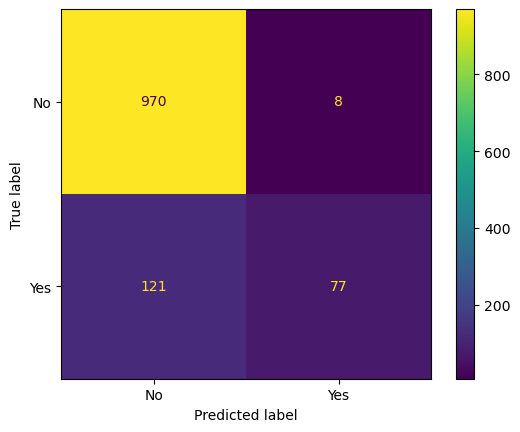


Accuracy of test set: 0.833

Classification report of test set:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91       255
         Yes       0.22      0.10      0.14        39

    accuracy                           0.83       294
   macro avg       0.55      0.52      0.52       294
weighted avg       0.79      0.83      0.81       294



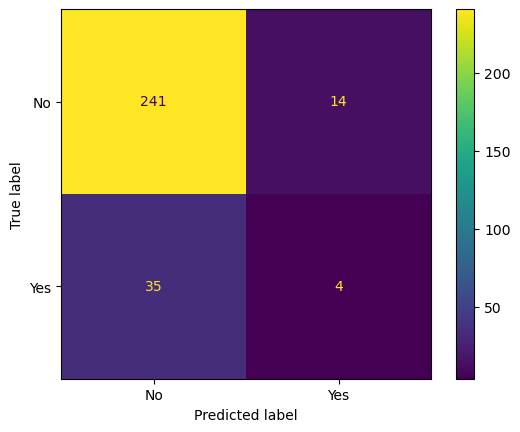

In [23]:
model = DecisionTreeClassifier(max_depth=10,
                             criterion = 'gini',
                             min_samples_split=2,
                             min_samples_leaf = 2,
                             max_features = 3)
functions.build_evaluate_model(model, X_train, X_test, y_train, y_test)

## Random Forest Classifier

Best parameters for random forest:

In [24]:
param_grid = {
    'n_estimators': [50, 100, 150], # 3 * 2 * 2 * 2 * 1 = 3 * 8 = 24
    'min_samples_split': [2, 4], 
    'min_samples_leaf' : [1, 2],
    'max_depth':[7,11],
    'max_features': ['sqrt']
    }

ranf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(ranf, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}


Accuracy of train set: 0.968

Classification report of train set:
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       978
         Yes       1.00      0.81      0.89       198

    accuracy                           0.97      1176
   macro avg       0.98      0.90      0.94      1176
weighted avg       0.97      0.97      0.97      1176



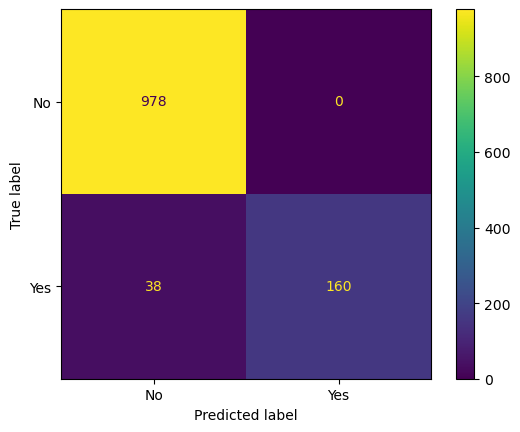


Accuracy of test set: 0.874

Classification report of test set:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       1.00      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.94      0.53      0.51       294
weighted avg       0.89      0.87      0.82       294



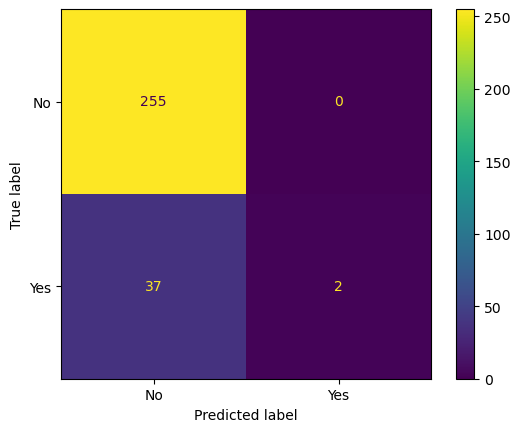

In [25]:
model = RandomForestClassifier(max_depth= 11,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 4,
 n_estimators= 100)

functions.build_evaluate_model(model, X_train, X_test, y_train, y_test)

## Balance data to compare with unbalanced data

In [26]:
ros = RandomOverSampler(random_state=42)

X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))
print(y_train_over.value_counts())

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177523,0.714286,0.25,0.666667,0.385714,0.333333,0.000000,0.067773,0.318892,0.000000,0.214286,0.0,0.333333,1.000000,0.666667,No
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.132427,0.142857,0.25,0.333333,0.614286,0.666667,1.000000,0.002212,0.457699,0.111111,0.285714,0.0,1.000000,0.000000,0.666667,No
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.819613,0.678571,0.25,1.000000,0.214286,0.666667,1.000000,0.311848,0.346838,0.222222,0.214286,0.0,1.000000,0.333333,0.666667,No
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.279170,0.392857,0.50,1.000000,0.514286,0.666667,0.333333,0.225698,0.224814,0.444444,0.714286,1.0,0.666667,0.000000,0.666667,No
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149606,0.678571,0.50,0.333333,0.842857,0.666667,0.666667,0.167878,0.663722,0.111111,0.000000,0.0,0.000000,0.333333,0.666667,No


Resampled dataset shape Counter({'No': 978, 'Yes': 978})
No     978
Yes    978
Name: Attrition, dtype: int64



Accuracy of train set: 0.791

Classification report of train set:
              precision    recall  f1-score   support

          No       0.80      0.77      0.79       978
         Yes       0.78      0.81      0.79       978

    accuracy                           0.79      1956
   macro avg       0.79      0.79      0.79      1956
weighted avg       0.79      0.79      0.79      1956



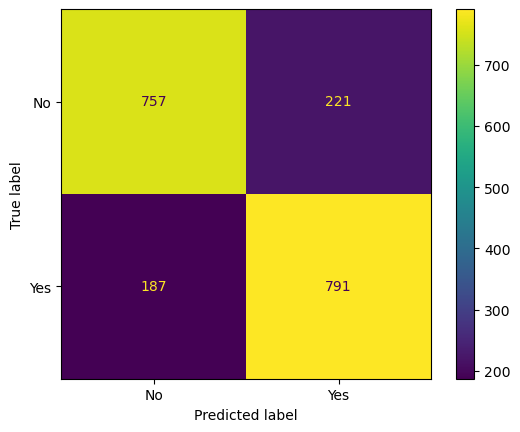


Accuracy of test set: 0.741

Classification report of test set:
              precision    recall  f1-score   support

          No       0.93      0.76      0.84       255
         Yes       0.28      0.62      0.39        39

    accuracy                           0.74       294
   macro avg       0.61      0.69      0.61       294
weighted avg       0.84      0.74      0.78       294



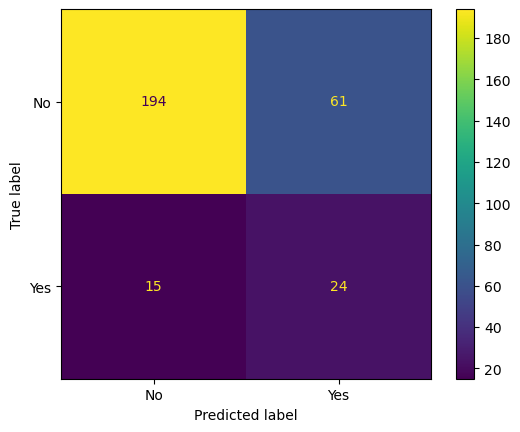

In [27]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
functions.build_evaluate_model(model, X_train_over, X_test, y_train_over, y_test)


Accuracy of train set: 0.936

Classification report of train set:
              precision    recall  f1-score   support

          No       0.97      0.90      0.93       978
         Yes       0.91      0.97      0.94       978

    accuracy                           0.94      1956
   macro avg       0.94      0.94      0.94      1956
weighted avg       0.94      0.94      0.94      1956



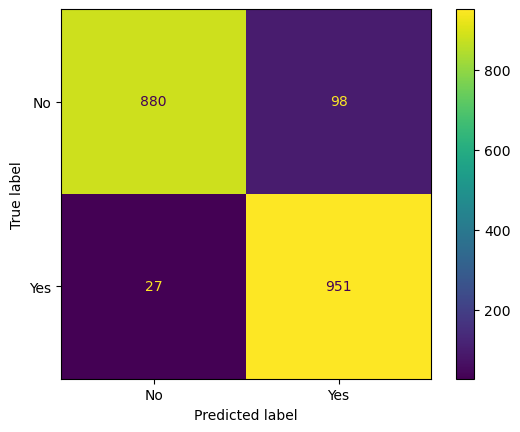


Accuracy of test set: 0.728

Classification report of test set:
              precision    recall  f1-score   support

          No       0.88      0.80      0.84       255
         Yes       0.17      0.28      0.22        39

    accuracy                           0.73       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.79      0.73      0.75       294



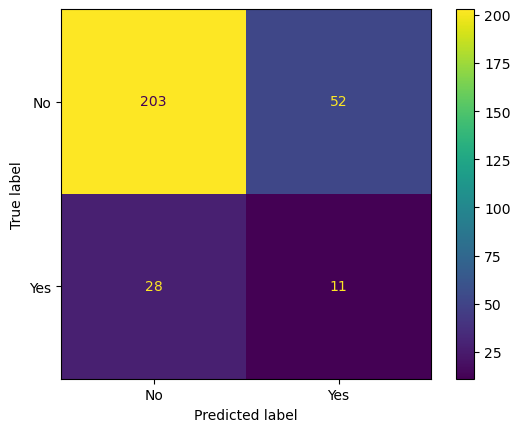

In [28]:
model = KNeighborsClassifier(n_neighbors=4)
functions.build_evaluate_model(model, X_train_over, X_test, y_train_over, y_test)


Accuracy of train set: 0.899

Classification report of train set:
              precision    recall  f1-score   support

          No       0.93      0.87      0.90       978
         Yes       0.87      0.93      0.90       978

    accuracy                           0.90      1956
   macro avg       0.90      0.90      0.90      1956
weighted avg       0.90      0.90      0.90      1956



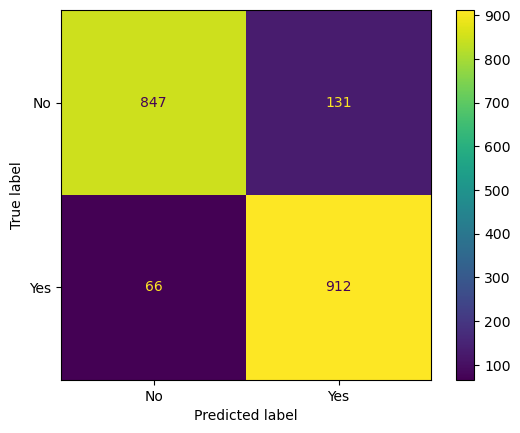


Accuracy of test set: 0.721

Classification report of test set:
              precision    recall  f1-score   support

          No       0.88      0.79      0.83       255
         Yes       0.17      0.28      0.21        39

    accuracy                           0.72       294
   macro avg       0.52      0.54      0.52       294
weighted avg       0.78      0.72      0.75       294



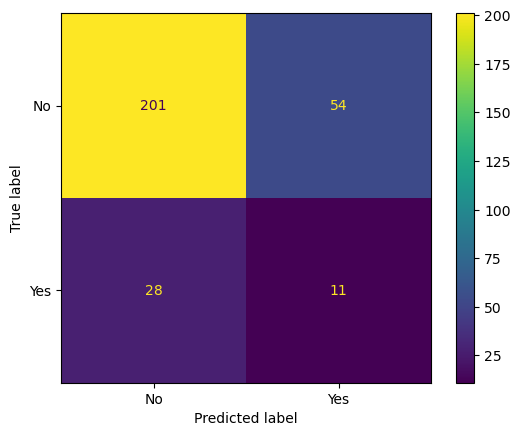

In [29]:
model = DecisionTreeClassifier(max_depth=10,
                             criterion = 'gini',
                             min_samples_split=2,
                             min_samples_leaf = 2,
                             max_features = 3)
functions.build_evaluate_model(model, X_train_over, X_test, y_train_over, y_test)


Accuracy of train set: 0.628

Classification report of train set:
              precision    recall  f1-score   support

          No       0.66      0.52      0.58       978
         Yes       0.61      0.74      0.66       978

    accuracy                           0.63      1956
   macro avg       0.63      0.63      0.62      1956
weighted avg       0.63      0.63      0.62      1956



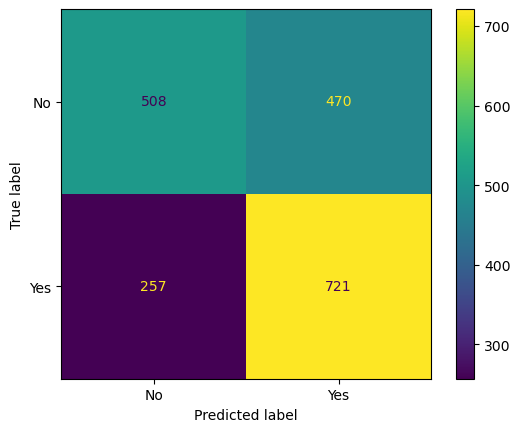


Accuracy of test set: 0.483

Classification report of test set:
              precision    recall  f1-score   support

          No       0.89      0.46      0.61       255
         Yes       0.15      0.62      0.24        39

    accuracy                           0.48       294
   macro avg       0.52      0.54      0.42       294
weighted avg       0.79      0.48      0.56       294



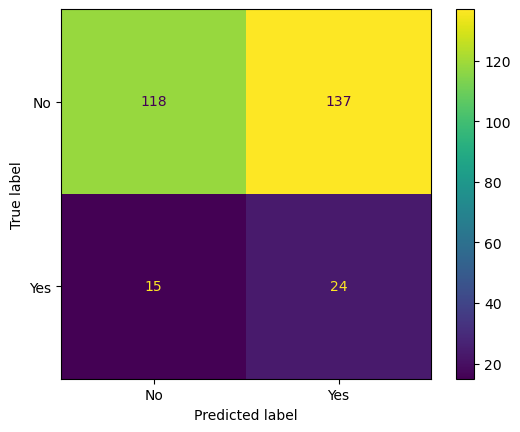

In [31]:
model = RandomForestClassifier(max_depth=5,
                             min_samples_split=2,
                             min_samples_leaf = 2,
                             max_samples = 5,
                             random_state= 42)
functions.build_evaluate_model(model, X_train_over, X_test, y_train_over, y_test)